In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import sklearn.metrics as sm

In [2]:
#Générer les données

dataset = make_blobs(n_samples=500,
                     centers=2,
                     n_features=2,
                     cluster_std=0.9,
                     random_state=0
                     )

In [3]:
dataset

(array([[ 4.39587444e-01,  4.25647676e+00],
        [ 2.22080047e+00,  5.50722876e-01],
        [ 6.16765952e-01,  4.63683763e+00],
        [ 2.53571915e+00,  4.91983832e+00],
        [ 2.91989158e+00,  2.09382022e+00],
        [ 1.39308737e+00,  4.55497352e+00],
        [-3.78731493e-02,  3.64617735e+00],
        [ 5.59033701e-01,  4.73712065e+00],
        [ 2.79355714e+00,  2.12161735e+00],
        [ 3.40287173e+00,  4.23725513e+00],
        [ 4.54515209e-02,  4.91722239e+00],
        [ 2.53201381e-01,  3.68319253e+00],
        [-6.04031447e-01,  4.70962834e+00],
        [ 3.96037944e+00, -5.52126903e-01],
        [ 1.01103758e+00,  2.81274374e+00],
        [ 1.83744967e+00,  2.26409871e+00],
        [ 9.62156178e-01,  4.44862268e+00],
        [ 5.86086550e-01,  8.37242921e-01],
        [ 2.07422334e+00,  9.87172671e-01],
        [ 1.12627622e+00,  4.87531562e+00],
        [ 6.63149144e-01,  4.44450140e+00],
        [ 1.45432607e+00,  2.41139323e+00],
        [ 2.50408877e+00,  1.840

In [4]:
data =dataset[0]
#labels
target = dataset[1]


In [5]:
data

array([[ 4.39587444e-01,  4.25647676e+00],
       [ 2.22080047e+00,  5.50722876e-01],
       [ 6.16765952e-01,  4.63683763e+00],
       [ 2.53571915e+00,  4.91983832e+00],
       [ 2.91989158e+00,  2.09382022e+00],
       [ 1.39308737e+00,  4.55497352e+00],
       [-3.78731493e-02,  3.64617735e+00],
       [ 5.59033701e-01,  4.73712065e+00],
       [ 2.79355714e+00,  2.12161735e+00],
       [ 3.40287173e+00,  4.23725513e+00],
       [ 4.54515209e-02,  4.91722239e+00],
       [ 2.53201381e-01,  3.68319253e+00],
       [-6.04031447e-01,  4.70962834e+00],
       [ 3.96037944e+00, -5.52126903e-01],
       [ 1.01103758e+00,  2.81274374e+00],
       [ 1.83744967e+00,  2.26409871e+00],
       [ 9.62156178e-01,  4.44862268e+00],
       [ 5.86086550e-01,  8.37242921e-01],
       [ 2.07422334e+00,  9.87172671e-01],
       [ 1.12627622e+00,  4.87531562e+00],
       [ 6.63149144e-01,  4.44450140e+00],
       [ 1.45432607e+00,  2.41139323e+00],
       [ 2.50408877e+00,  1.84083860e+00],
       [ 4.

In [6]:
target

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

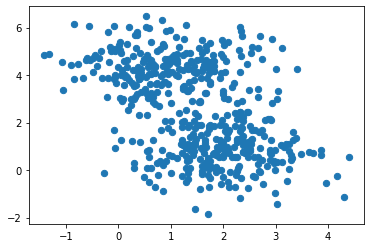

In [7]:
#Affichage des données
plt.scatter(data[:,0],data[:,1], s=40)
plt.show()


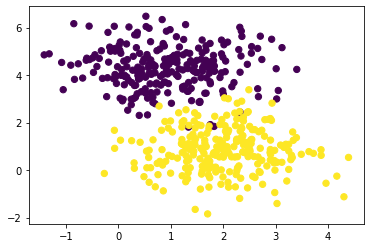

In [8]:
plt.scatter(data[:,0],data[:,1], c=target, s=40)
plt.show()

In [9]:
C=1.0
svm = SVC(C=C)
svm.fit(data,target)

SVC()

In [10]:
svm.score(data,target)


0.982

In [11]:
svm.support_vectors_

array([[ 3.40287173,  4.23725513],
       [ 1.01103758,  2.81274374],
       [ 0.55429231,  2.32249017],
       [ 2.32130617,  2.4408008 ],
       [ 3.01904924,  2.99485822],
       [ 2.00173069,  3.19244409],
       [ 3.04979511,  3.34977309],
       [ 1.39536627,  2.92116801],
       [ 0.39701352,  2.30272449],
       [-0.85134594,  6.1618309 ],
       [ 1.67219776,  3.23829475],
       [ 1.75260649,  1.91373014],
       [ 1.99024241,  3.33184897],
       [ 1.64873958,  3.23373687],
       [ 0.69815841,  2.7953839 ],
       [ 0.17726291,  2.52107051],
       [ 2.67110571,  3.09080417],
       [ 1.82501156,  1.83807788],
       [ 2.31569705,  6.01008759],
       [ 1.5552531 ,  2.89022626],
       [ 1.33541179,  1.80845385],
       [ 1.53897838,  2.86193544],
       [ 1.55238845,  2.84852689],
       [ 0.6581815 ,  2.84896056],
       [ 0.52373505,  6.47499564],
       [ 2.65707227,  3.42423724],
       [ 1.83744967,  2.26409871],
       [ 1.45432607,  2.41139323],
       [ 2.26660689,

In [13]:
np.shape(svm.support_vectors_)

(50, 2)

In [14]:
svm.predict(data)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [15]:
sm.confusion_matrix(target, svm.predict(data))

array([[245,   5],
       [  4, 246]], dtype=int64)

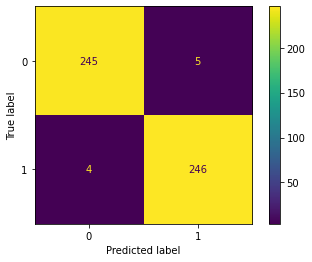

In [16]:
sm.plot_confusion_matrix(svm,data,target)  

In [17]:
sm.roc_auc_score(target, svm.predict(data))

0.982

In [18]:
sm.classification_report(target, svm.predict(data))


'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       250\n           1       0.98      0.98      0.98       250\n\n    accuracy                           0.98       500\n   macro avg       0.98      0.98      0.98       500\nweighted avg       0.98      0.98      0.98       500\n'